In [1]:
# Import scikit-plot
import scikitplot.seaborn as sp

In [2]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)  # reproducibility
import pandas as pd

from sklearn.datasets import (
    load_breast_cancer as data_2_classes,
    # load_iris as data_3_classes,
)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
# Load the data
# X, y = data_3_classes(return_X_y=True, as_frame=False)
X, y = data_2_classes(return_X_y=True, as_frame=False)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=0)
np.unique(y)

array([0, 1])

In [4]:
# Create an instance of the LogisticRegression
model = (
    LogisticRegression(max_iter=int(1e5), random_state=0)
    .fit(X_train, y_train)
)
# Perform predictions
y_val_prob = model.predict_proba(X_val)
# Create a DataFrame with predictions
df = pd.DataFrame({
    "y_true": y_val==1,  # target class (0,1,2)
    "y_score": y_val_prob[:, 1],  # target class (0,1,2)
    # "y_true": np.random.normal(0.5, 0.1, 100).round(),
    # "y_score": np.random.normal(0.5, 0.15, 100),
    # "hue": np.random.normal(0.5, 0.4, 100).round(),
})

In [5]:
p = sp.decileplot(
    df,
    x="y_true",
    y="y_score",
    kind="df",
    n_deciles=10,
    digits=4,
    verbose=True,
)
p
# p.columns.tolist()
# p[["decile", "cnt_resp", "cnt_resp_wiz", "cum_resp_pct", "cum_resp_wiz_pct"]]
p.iloc[:, range(9, 23)]
# p.iloc[:, [11, 12, 12, 14]]

{
  "decile": "Meaning: Ranked group based on predicted probabilities (1 = highest probability). Critical: Ensure data is sorted descending by model score; top deciles should capture the majority of positives. Formula: Assign samples to k quantiles (e.g., 10 deciles) based on model score.",
  "prob_min": "Meaning: Minimum predicted probability within the decile. Critical: Indicates model calibration; values too close to prob_max suggest poor separation. Formula: min(score in decile).",
  "prob_max": "Meaning: Maximum predicted probability within the decile. Critical: Checks separation; overlap with lower deciles indicates poor discrimination. Formula: max(score in decile).",
  "prob_avg": "Meaning: Average predicted probability within the decile. Critical: Useful for calibration checks; should decrease monotonically across deciles. Formula: mean(score in decile).",
  "cnt_resp_true": "Meaning: Actual positives/responders in the decile. Critical: Should never exceed cnt_resp_wiz_true; f

,rate_resp,rate_resp_wiz,overall_rate,cum_resp_true,cum_resp_true_pct,cum_resp_false,cum_resp_false_pct,cum_resp_total,cum_resp_total_pct,cum_resp_rndm_true,cum_resp_rndm_true_pct,cum_resp_wiz_true,cum_resp_wiz_true_pct,cumulative_lift
0,100.0000,100.0000,64.5614,29.0,15.7609,0.0,0.0000,29.0,10.1754,18.4,10.0,29,15.7609,1.5489
1,100.0000,100.0000,64.5614,57.0,30.9783,0.0,0.0000,57.0,20.0000,36.8,20.0,57,30.9783,1.5489
2,100.0000,100.0000,64.5614,86.0,46.7391,0.0,0.0000,86.0,30.1754,55.2,30.0,86,46.7391,1.5489
3,100.0000,100.0000,64.5614,114.0,61.9565,0.0,0.0000,114.0,40.0000,73.6,40.0,114,61.9565,1.5489
4,100.0000,100.0000,64.5614,143.0,77.7174,0.0,0.0000,143.0,50.1754,92.0,50.0,143,77.7174,1.5489
5,89.2857,100.0000,64.5614,168.0,91.3043,3.0,2.9703,171.0,60.0000,110.4,60.0,171,92.9348,1.5217
6,55.1724,44.8276,64.5614,184.0,100.0000,16.0,15.8416,200.0,70.1754,128.8,70.0,184,100.0000,1.4250
7,0.0000,0.0000,64.5614,184.0,100.0000,44.0,43.5644,228.0,80.0000,147.2,80.0,184,100.0000,1.2500
8,0.0000,0.0000,64.5614,184.0,100.0000,73.0,72.2772,257.0,90.1754,165.6,90.0,184,100.0000,1.1089
9,0.0000,0.0000,64.5614,184.0,100.0000,101.0,100.0000,285.0,100.0000,184.0,100.0,184,100.0000,1.0000


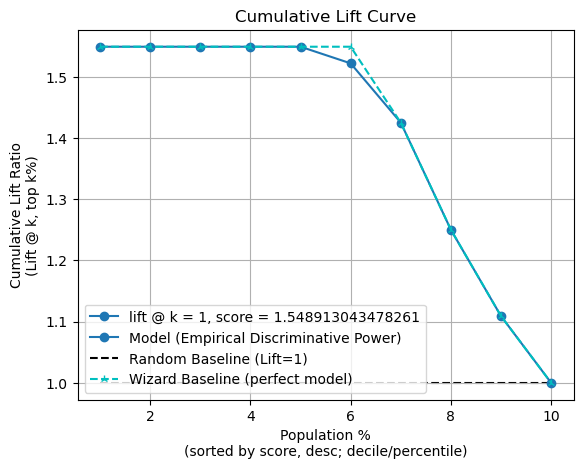

In [6]:
p = sp.decileplot(df, x="y_true", y="y_score", kind="cumulative_lift", n_deciles=10)

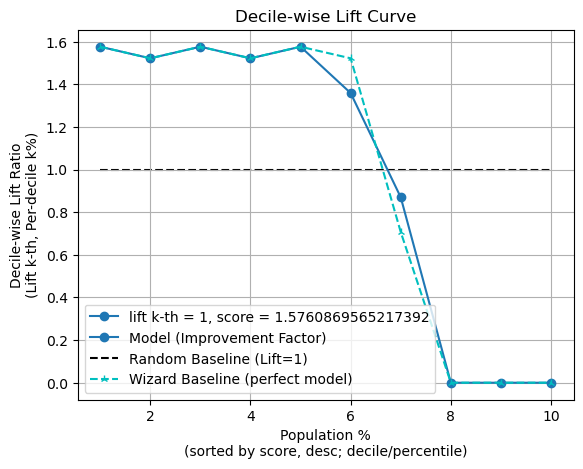

In [7]:
p = sp.decileplot(df, x="y_true", y="y_score", kind="decile_wise_lift", n_deciles=10)

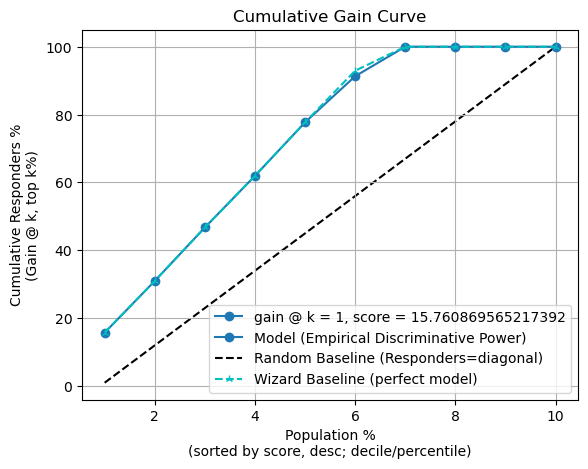

In [8]:
p = sp.decileplot(df, x="y_true", y="y_score", kind="cumulative_gain", n_deciles=10)

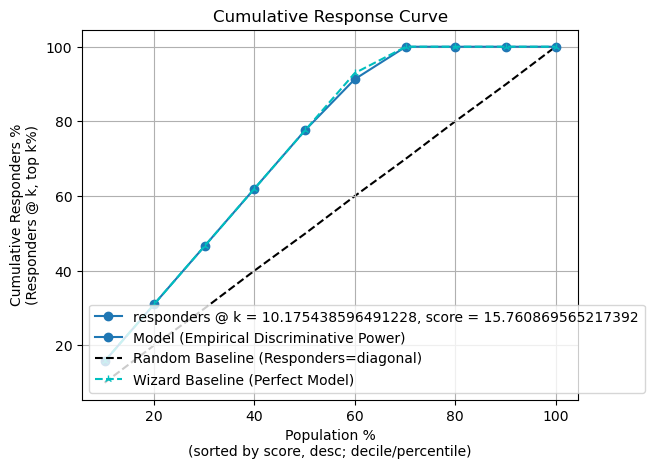

In [9]:
p = sp.decileplot(df, x="y_true", y="y_score", kind="cumulative_response", n_deciles=10)

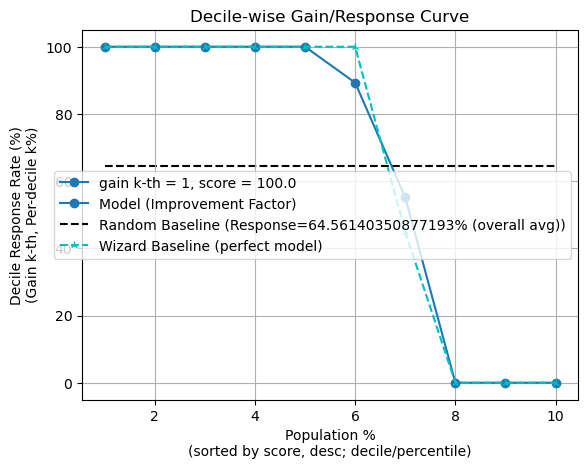

In [10]:
p = sp.decileplot(df, x="y_true", y="y_score", kind="decile_wise_gain", n_deciles=10)

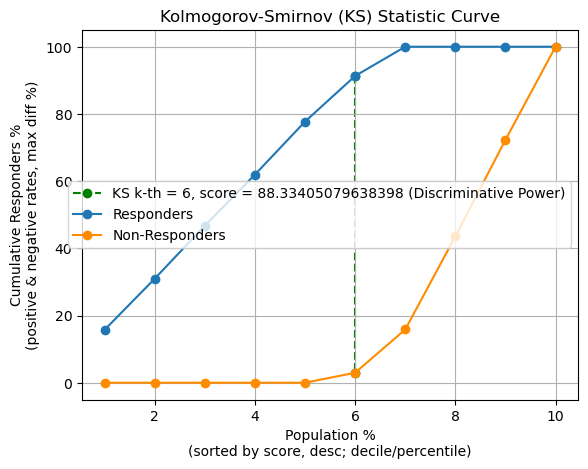

In [11]:
p = sp.decileplot(df, x="y_true", y="y_score", kind="ks_statistic", n_deciles=10)

{
  "decile": "Meaning: Ranked group based on predicted probabilities (1 = highest probability). Critical: Ensure data is sorted descending by model score; top deciles should capture the majority of positives. Formula: Assign samples to k quantiles (e.g., 10 deciles) based on model score.",
  "prob_min": "Meaning: Minimum predicted probability within the decile. Critical: Indicates model calibration; values too close to prob_max suggest poor separation. Formula: min(score in decile).",
  "prob_max": "Meaning: Maximum predicted probability within the decile. Critical: Checks separation; overlap with lower deciles indicates poor discrimination. Formula: max(score in decile).",
  "prob_avg": "Meaning: Average predicted probability within the decile. Critical: Useful for calibration checks; should decrease monotonically across deciles. Formula: mean(score in decile).",
  "cnt_resp_true": "Meaning: Actual positives/responders in the decile. Critical: Should never exceed cnt_resp_wiz_true; f

,decile,prob_min,prob_max,prob_avg,cnt_resp_true,cnt_resp_false,cnt_resp_total,cnt_resp_rndm_true,cnt_resp_wiz_true,rate_resp,...,cum_resp_total_pct,cum_resp_rndm_true,cum_resp_rndm_true_pct,cum_resp_wiz_true,cum_resp_wiz_true_pct,cumulative_lift,cumulative_lift_wiz,decile_wise_lift,decile_wise_lift_wiz,KS
0,1,0.999885,0.999998,0.999948,29.0,0.0,29.0,18.4,29,100.000000,...,10.175439,18.4,10.0,29,15.760870,1.548913,1.548913,1.576087,1.576087,15.760870
1,2,0.999344,0.999880,0.999661,28.0,0.0,28.0,18.4,28,100.000000,...,20.000000,36.8,20.0,57,30.978261,1.548913,1.548913,1.521739,1.521739,30.978261
2,3,0.997519,0.999335,0.998695,29.0,0.0,29.0,18.4,29,100.000000,...,30.175439,55.2,30.0,86,46.739130,1.548913,1.548913,1.576087,1.576087,46.739130
3,4,0.992537,0.997395,0.995925,28.0,0.0,28.0,18.4,28,100.000000,...,40.000000,73.6,40.0,114,61.956522,1.548913,1.548913,1.521739,1.521739,61.956522
4,5,0.957771,0.992279,0.979970,29.0,0.0,29.0,18.4,29,100.000000,...,50.175439,92.0,50.0,143,77.717391,1.548913,1.548913,1.576087,1.576087,77.717391
5,6,0.775711,0.955006,0.887510,25.0,3.0,28.0,18.4,28,89.285714,...,60.000000,110.4,60.0,171,92.934783,1.521739,1.548913,1.358696,1.521739,88.334051
6,7,0.066257,0.770733,0.347654,16.0,13.0,29.0,18.4,13,55.172414,...,70.175439,128.8,70.0,184,100.000000,1.425000,1.425000,0.869565,0.706522,84.158416
7,8,0.000370,0.048536,0.011200,0.0,28.0,28.0,18.4,0,0.000000,...,80.000000,147.2,80.0,184,100.000000,1.250000,1.250000,0.000000,0.000000,56.435644
8,9,0.000001,0.000356,0.000058,0.0,29.0,29.0,18.4,0,0.000000,...,90.175439,165.6,90.0,184,100.000000,1.108949,1.108949,0.000000,0.000000,27.722772
9,10,0.000000,0.000001,0.000000,0.0,28.0,28.0,18.4,0,0.000000,...,100.000000,184.0,100.0,184,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000


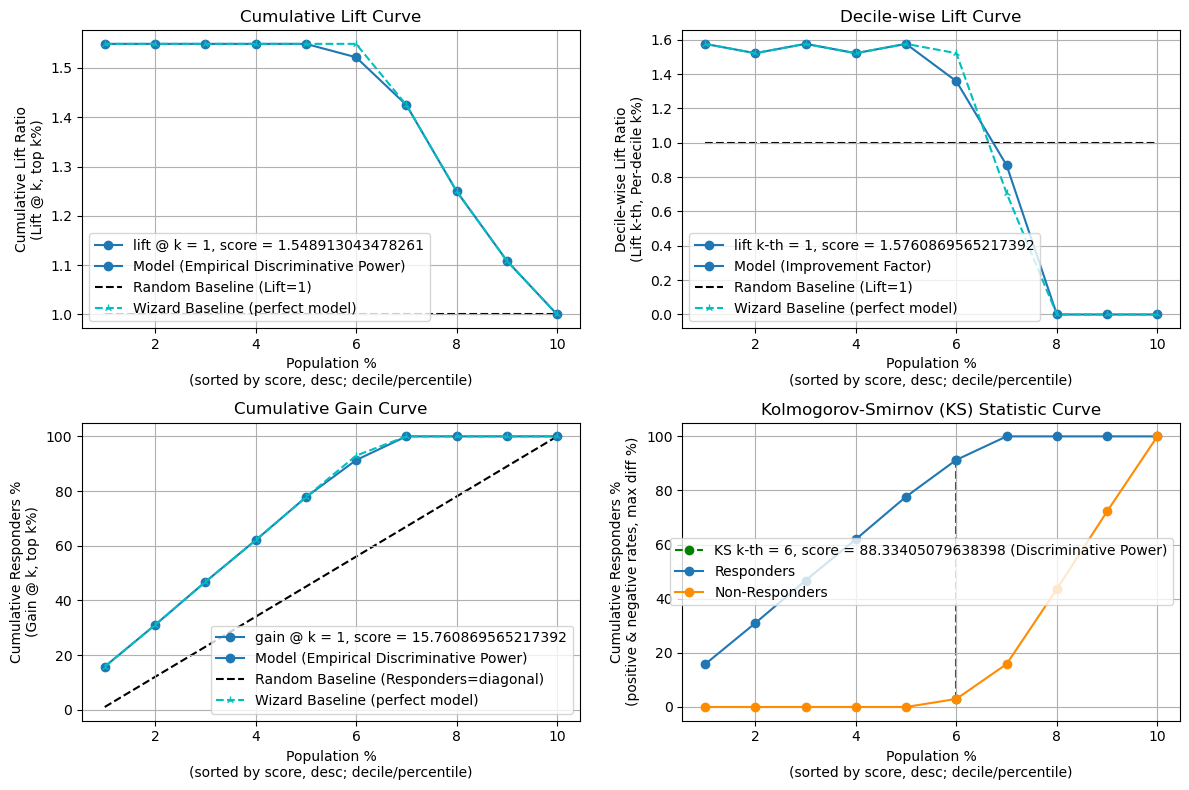

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))
p = sp.decileplot(
    df,
    x="y_true",
    y="y_score",
    kind="report",
    n_deciles=10,
    digits=6,
    verbose=True,
)